In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sys
import os
%matplotlib inline

In [2]:
path = os.path.dirname(os.path.abspath('__file__'))+'\\Prepared_tables\\'
path_saving = os.path.dirname(os.path.abspath('__file__'))+'\\raw_figures\\'

df = pd.read_csv((path+ 'Prep_Protein Groups_imputed.csv'), low_memory=False)

df['SubMitoLocalization'] = df['SubMitoLocalization'].astype(str)
df['IMPI_new'] = df['IMPI_new'].astype(str)
df['IMPI_new'] = [df['IMPI_new'][i].split(';') for i in range(len(df))]
df['Mito_filt'] = ['Mitochondrial' if (df['SubMitoLocalization'][i]!='nan' or('Verified mitochondrial' in df['IMPI_new'][i])==True) else 'Not Mitochondrial' for i in range(len(df))]

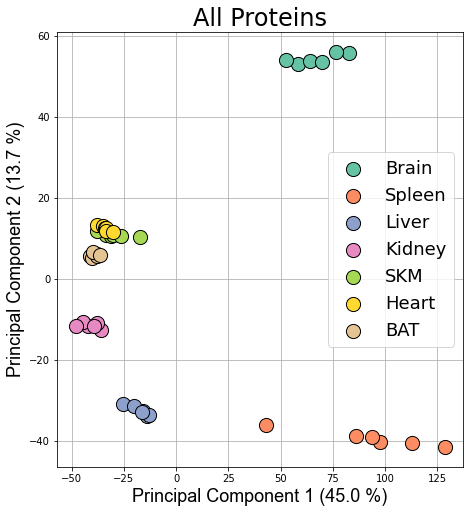

In [3]:
#df = df[df['Mito_filt'] == 'Mitochondrial'].reset_index(drop = True)

#get normalized columns and imputed columns for further processing
columns = [i for i in range(len(df.columns)) if ('Norm_Intensity ' in df.columns[i]) & ('Norm_Intensity wt' not in df.columns[i])&('_Norm_Intensity' not in df.columns[i])]
columns = df.columns[columns].tolist()
columns.extend(['Gene names'])

#prepare transposed table
df_T = df.loc[:,columns].T
df_T.columns = df_T.iloc[-1]
df_T = df_T.drop(df_T.index[-1]).reset_index(drop=False)
df_T = df_T.rename(columns={'index':"target"})
df_T['target'] = [df_T['target'][i][15:-2] for i in range(len(df_T))]

#get all values and normalize 
X = df_T.iloc[:,1:].values
sc=StandardScaler()  
X=sc.fit_transform(X) 
#pd.DataFrame(X,columns=df_T.columns[1:]).head()

#Define two components  
pca=PCA(n_components=2) 
principalComponents=pca.fit_transform(X) 
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2']) 
#principalDf.head()

#add targets to table 
finalDf=pd.concat([principalDf,df_T['target']],axis=1)

#make figure
fig=plt.figure(figsize=(16,8))  
ax=fig.add_subplot(1,2,1)  
ax.set_xlabel('Principal Component 1 ('+str(round(pca.explained_variance_ratio_[0]*100,1))+' %)',fontsize = 18,family='Arial')  
ax.set_ylabel('Principal Component 2 ('+str(round(pca.explained_variance_ratio_[1]*100,1))+' %)',fontsize = 18,family='Arial')  
ax.set_title('All Proteins',fontsize=24)  
#targets= list(set(df_T['target']))
#targets.sort()
#legend_text= ['Brain','BAT', 'Heart', 'Kidney', 'Liver', 'Spleen', 'SKM']
targets = ['B','S', 'L', 'K', 'SKM', 'H', 'BAT'] # custom order 
legend_text= ['Brain','Spleen', 'Liver', 'Kidney', 'SKM', 'Heart', 'BAT'] 
colors=['#66c2a5',"#fc8d62","#8da0cb","#e78ac3","#a6d854","#ffd92f","#e5c494"]#['r','g','b','r','g','b','r']  
for target,color in zip(targets,colors):    
    indicesToKeep = finalDf['target'] == target  
    ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'],
             finalDf.loc[indicesToKeep,'principal component 2'],
            c=color,
            alpha = 1.0,
            edgecolors = 'black',
            s=200,
            zorder = 2)
ax.legend(legend_text,fontsize=18)
ax.grid(zorder = 0)

fig.savefig(path_saving+'Sup_Fig_1\\PCA_Proteins_all.pdf', bbox_inches = "tight")


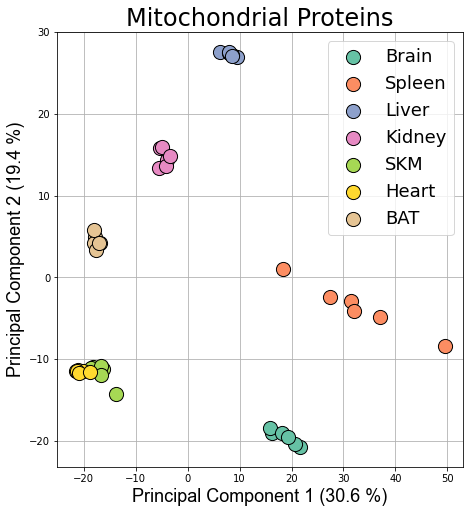

In [4]:
df = df[df['Mito_filt'] == 'Mitochondrial'].reset_index(drop = True)

#get normalized columns and imputed columns for further processing
columns = [i for i in range(len(df.columns)) if ('Norm_Intensity ' in df.columns[i]) & ('Norm_Intensity wt' not in df.columns[i])&('_Norm_Intensity' not in df.columns[i])]
columns = df.columns[columns].tolist()
columns.extend(['Gene names'])

#prepare transposed table
df_T = df.loc[:,columns].T
df_T.columns = df_T.iloc[-1]
df_T = df_T.drop(df_T.index[-1]).reset_index(drop=False)
df_T = df_T.rename(columns={'index':"target"})
df_T['target'] = [df_T['target'][i][15:-2] for i in range(len(df_T))]

#get all values and normalize 
X = df_T.iloc[:,1:].values
sc=StandardScaler()  
X=sc.fit_transform(X) 
#pd.DataFrame(X,columns=df_T.columns[1:]).head()

#Define two components  
pca=PCA(n_components=2) 
principalComponents=pca.fit_transform(X) 
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2']) 
#principalDf.head()

#add targets to table 
finalDf=pd.concat([principalDf,df_T['target']],axis=1)

#make figure
fig=plt.figure(figsize=(16,8))  
ax=fig.add_subplot(1,2,1)  
ax.set_xlabel('Principal Component 1 ('+str(round(pca.explained_variance_ratio_[0]*100,1))+' %)',fontsize = 18,family='Arial')  
ax.set_ylabel('Principal Component 2 ('+str(round(pca.explained_variance_ratio_[1]*100,1))+' %)',fontsize = 18,family='Arial')  
ax.set_title('Mitochondrial Proteins',fontsize=24)  
#targets= list(set(df_T['target']))
#targets.sort()
#legend_text= ['Brain','BAT', 'Heart', 'Kidney', 'Liver', 'Spleen', 'SKM'] 
targets = ['B','S', 'L', 'K', 'SKM', 'H', 'BAT'] # custom order 
legend_text= ['Brain','Spleen', 'Liver', 'Kidney', 'SKM', 'Heart', 'BAT'] 
colors=['#66c2a5',"#fc8d62","#8da0cb","#e78ac3","#a6d854","#ffd92f","#e5c494"]#['r','g','b','r','g','b','r']  
for target,color in zip(targets,colors):    
    indicesToKeep = finalDf['target'] == target  
    ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'],
             finalDf.loc[indicesToKeep,'principal component 2'],
            c=color,
            alpha = 1.0,
            edgecolors = 'black',
            s=200,
            zorder = 2)
ax.legend(legend_text,fontsize=18)
ax.grid(zorder = 0)

fig.savefig(path_saving+'Figure_2\\PCA_Proteins_Mito.pdf', bbox_inches = "tight")
